In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as plt_img

In [2]:
a = np.array([[0,0,0,0,0,0],[0,1,1,1,1,0],[0,1,-1,-1,1,0],[0,1,-1,-1,1,0],[0,1,1,1,1,0],[0,0,0,0,0,0]])

In [3]:
a

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  1,  0],
       [ 0,  1, -1, -1,  1,  0],
       [ 0,  1, -1, -1,  1,  0],
       [ 0,  1,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0]])

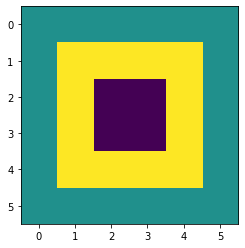

In [4]:
plt.imshow(a)

In [5]:
blur = np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])

In [6]:
for i in a:
    print(i)

[0 0 0 0 0 0]
[0 1 1 1 1 0]
[ 0  1 -1 -1  1  0]
[ 0  1 -1 -1  1  0]
[0 1 1 1 1 0]
[0 0 0 0 0 0]


In [7]:
16 filter -->3 ,l= 6, b = 6, one_step = 4, down_step = 4

SyntaxError: invalid syntax (<ipython-input-7-5c03f54abf2e>, line 1)

In [8]:
"""
if filter is 3x3 ==> then 2  eg: l=6 ,b=6, step = 6-2 = 4
if filter is 2x2 ==> then 1  eg: l=7, b=8, step = 7-1 = 6, step = 8-1 = 7 

"""

'\nif filter is 3x3 ==> then 2  eg: l=6 ,b=6, step = 6-2 = 4\nif filter is 2x2 ==> then 1  eg: l=7, b=8, step = 7-1 = 6, step = 8-1 = 7 \n\n'

In [9]:
a[:3,:3], a[:3,1:4], a[:3,2:5] , a[:3, 3:6]

(array([[ 0,  0,  0],
        [ 0,  1,  1],
        [ 0,  1, -1]]),
 array([[ 0,  0,  0],
        [ 1,  1,  1],
        [ 1, -1, -1]]),
 array([[ 0,  0,  0],
        [ 1,  1,  1],
        [-1, -1,  1]]),
 array([[ 0,  0,  0],
        [ 1,  1,  0],
        [-1,  1,  0]]))

In [10]:
a

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  1,  1,  0],
       [ 0,  1, -1, -1,  1,  0],
       [ 0,  1, -1, -1,  1,  0],
       [ 0,  1,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0]])

In [11]:
a[2:5,:3], a[2:5,1:4] ,a[2:5,2:5], a[2:5,3:6]

(array([[ 0,  1, -1],
        [ 0,  1, -1],
        [ 0,  1,  1]]),
 array([[ 1, -1, -1],
        [ 1, -1, -1],
        [ 1,  1,  1]]),
 array([[-1, -1,  1],
        [-1, -1,  1],
        [ 1,  1,  1]]),
 array([[-1,  1,  0],
        [-1,  1,  0],
        [ 1,  1,  0]]))

In [12]:
a[3:,:3],a[3:,1:4] ,a[3:,2:5], a[3:,3:6]

(array([[ 0,  1, -1],
        [ 0,  1,  1],
        [ 0,  0,  0]]),
 array([[ 1, -1, -1],
        [ 1,  1,  1],
        [ 0,  0,  0]]),
 array([[-1, -1,  1],
        [ 1,  1,  1],
        [ 0,  0,  0]]),
 array([[-1,  1,  0],
        [ 1,  1,  0],
        [ 0,  0,  0]]))

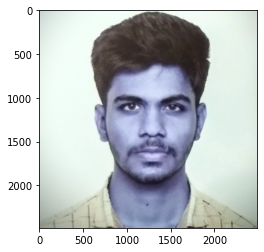

In [13]:
# testing with image

import cv2
img_path = "not_resized.jpg"
image = cv2.imread(img_path)
plt.imshow(image)

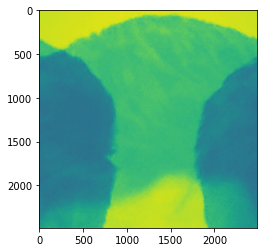

In [14]:
plt.imshow(np.resize(image,(2486,2486)))
image = np.resize(image,(2486,2486))


new_mat2 = []
for i in range(2484):
    new_mat = []
    for j in range(2484):
        val = image[i:i+3,j:3+j]
        new_mat.append(np.sum(blur*val))
    new_mat2.append(new_mat)
        


In [15]:
np.sum([[0,0,0],[0,-1,1],[0,1,1]])

2

## let see some example for cnn (MNIST)

In [16]:
from tensorflow.keras.datasets import mnist

In [17]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [19]:
# visualizaton

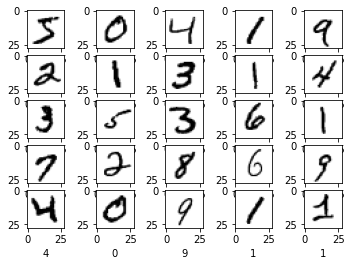

In [20]:
for i,j in enumerate(X_train[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(j, cmap="binary")
    plt.xlabel(y_train[i])

In [21]:
y_train, y_train.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [22]:
# categories the y_train because of multi class 

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [25]:
y_train_cat.shape, y_train_cat[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [26]:
# scaling the train and test set

In [27]:
X_train_scaled = X_train/ 255.0
X_test_scaled = X_test/255.0

In [28]:
X_train_scaled.max(), X_test_scaled.min()

(1.0, 0.0)

In [29]:
X_train_scaled.shape

(60000, 28, 28)

In [30]:
# reshape the train and test datasets for color channels

X_train_scaled = X_train_scaled.reshape(60000, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(10000, 28, 28, 1)

In [31]:
X_train_scaled.shape

(60000, 28, 28, 1)

In [32]:
# tensorboard
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")

In [33]:
from tensorflow.keras.callbacks import TensorBoard

log_directory = "logs\\fit"+"\\"+timestamp

board = TensorBoard(
                        log_dir = log_directory,
                                histogram_freq = 1,
                                    write_graph = True,
                                        write_images = True,
                                            update_freq = "epoch",
                                                profile_batch = 2,
                                                    embeddings_freq = 1
)

In [34]:
# model creations

In [35]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [36]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = "relu"),
    MaxPool2D(pool_size = (2,2)),
    Flatten(),
    Dense(200, activation = "relu"),
    Dense(10, activation = "softmax")
])

model.compile(
    optimizer= "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)


In [37]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor = "val_loss",mode = "min", patience= 10)

In [38]:
Model = model.fit(X_train_scaled, y_train_cat, epochs = 6, validation_data= (X_test_scaled, y_test_cat), verbose =2, callbacks=[early, board])

Epoch 1/6
1875/1875 - 37s - loss: 0.1296 - accuracy: 0.9599 - val_loss: 0.0480 - val_accuracy: 0.9837
Epoch 2/6
1875/1875 - 35s - loss: 0.0447 - accuracy: 0.9865 - val_loss: 0.0421 - val_accuracy: 0.9857
Epoch 3/6
1875/1875 - 37s - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0405 - val_accuracy: 0.9866
Epoch 4/6
1875/1875 - 35s - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0398 - val_accuracy: 0.9882
Epoch 5/6
1875/1875 - 35s - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0356 - val_accuracy: 0.9894
Epoch 6/6
1875/1875 - 35s - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0384 - val_accuracy: 0.9887


In [39]:
# model evaluations

<AxesSubplot:>

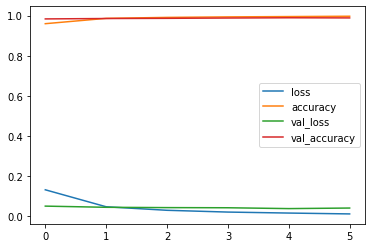

In [40]:
pd.DataFrame(Model.history).plot()

In [41]:
# evaluations

from sklearn.metrics import classification_report, confusion_matrix

In [42]:
y_pred = model.predict_classes(X_test_scaled)

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [43]:
a = classification_report(y_pred, y_test)
print(a)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1033
           3       0.99      0.99      0.99      1018
           4       0.99      0.98      0.99       987
           5       0.99      0.99      0.99       885
           6       0.99      0.99      0.99       954
           7       0.98      0.99      0.99      1017
           8       0.99      0.98      0.99       979
           9       0.98      0.98      0.98      1003

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
confusion_matrix(y_pred, y_test)

array([[ 977,    0,    1,    0,    0,    2,    6,    0,    3,    0],
       [   1, 1128,    1,    0,    0,    0,    1,    2,    0,    2],
       [   0,    0, 1023,    2,    0,    0,    0,    6,    2,    0],
       [   0,    2,    1, 1004,    0,    6,    0,    2,    1,    2],
       [   0,    0,    0,    0,  972,    0,    2,    0,    0,   13],
       [   0,    1,    0,    1,    0,  880,    2,    0,    0,    1],
       [   1,    3,    0,    0,    3,    2,  944,    0,    1,    0],
       [   1,    0,    3,    0,    1,    0,    0, 1010,    0,    2],
       [   0,    1,    3,    1,    0,    2,    3,    1,  964,    4],
       [   0,    0,    0,    2,    6,    0,    0,    7,    3,  985]],
      dtype=int64)

In [45]:
log_directory

'logs\\fit\\2021-01-16--1223'